In [150]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline

sns.set(style='white', context='notebook', palette='deep')

In [2]:
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_all = concat_df(df_train, df_test)

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [6]:
df_all

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [7]:
891+418

1309

In [8]:
print(df_train.columns)
print(df_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Exploratory Data Analysis

1.1 Overview
PassengerId is the unique id of the row and it doesn't have any effect on target
Survived is the target variable we are trying to predict (0 or 1):
1 = Survived
0 = Not Survived
Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
1 = Upper Class
2 = Middle Class
3 = Lower Class
Name, Sex and Age are self-explanatory
SibSp is the total number of the passengers' siblings and spouse
Parch is the total number of the passengers' parents and children
Ticket is the ticket number of the passenger
Fare is the passenger fare
Cabin is the cabin number of the passenger
Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
C = Cherbourg
Q = Queenstown
S = Southampton

In [9]:
print(df_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


## Sibsp

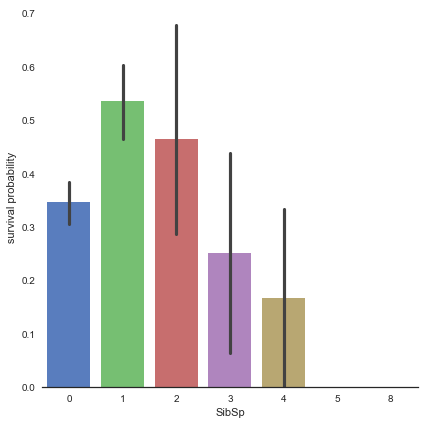

In [11]:
#Univariate Analysis
#SibSP
# Explore SibSp feature vs Survived
import seaborn as sns
g = sns.factorplot(x="SibSp",y="Survived",data=df_train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

It seems that passengers having a lot of siblings/spouses have less chance to survive

Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive

This observation is quite interesting, we can consider a new feature describing these categories (See feature engineering)

## Parch

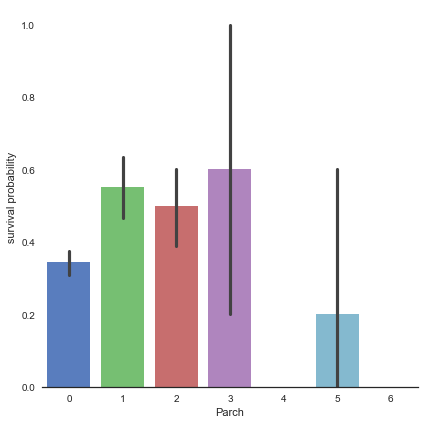

In [12]:
# Explore Parch feature vs Survived
g  = sns.factorplot(x="Parch",y="Survived",data=df_train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Small families have more chance to survive, more than single (Parch 0), medium (Parch 3,4) and large families (Parch 5,6 ).

Be carefull there is an important standard deviation in the survival of passengers with 3 parents/children

## Age

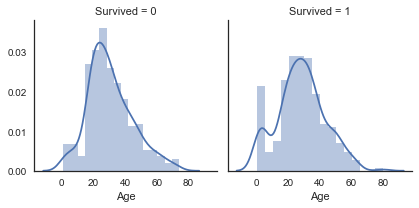

In [13]:
# Explore Age vs Survived
g = sns.FacetGrid(df_train, col='Survived')
g = g.map(sns.distplot, "Age")

Age distribution seems to be a tailed distribution, maybe a gaussian distribution.

We notice that age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survived.

So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

It seems that very young passengers have more chance to survive.

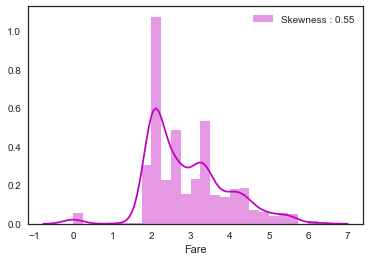

In [19]:
# Explore Fare distribution 
g = sns.distplot(df_all["Fare"], color="m", label="Skewness : %.2f"%(df_all["Fare"].skew()))
g = g.legend(loc="best")

As we can see, Fare distribution is very skewed. This can lead to overweigth very high values in the model, even if it is scaled.

In this case, it is better to transform it with the log function to reduce this skew.

In [15]:
# Apply log to Fare to reduce skewness distribution
df_all["Fare"] = df_all["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

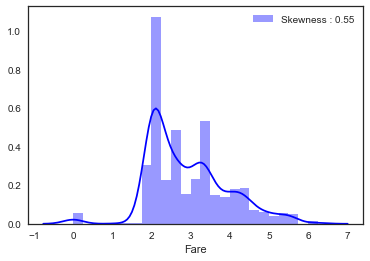

In [16]:
g = sns.distplot(df_all["Fare"], color="b", label="Skewness : %.2f"%(df_all["Fare"].skew()))
g = g.legend(loc="best")

In [17]:
df_all

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,1.981001,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,4.266662,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,2.070022,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,3.972177,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,2.085672,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,2.085672,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,4.690430,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,1.981001,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,2.085672,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


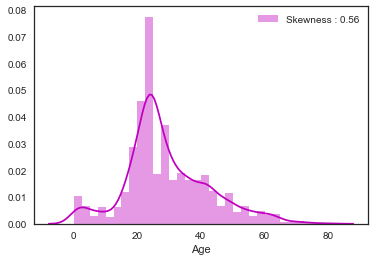

In [188]:
# Explore Fare distribution 
g = sns.distplot(df_all["Age"], color="m", label="Skewness : %.2f"%(df_all["Age"].skew()))
g = g.legend(loc="best")

## Categorical values
## Sex

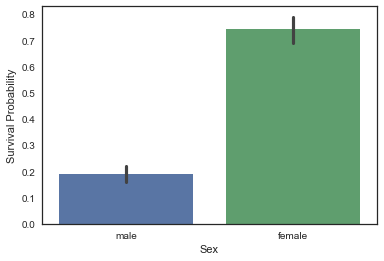

In [20]:
g = sns.barplot(x="Sex",y="Survived",data=df_train)
g = g.set_ylabel("Survival Probability")

In [21]:
df_train[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


It is clearly obvious that Male have less chance to survive than Female.

So Sex, might play an important role in the prediction of the survival.

For those who have seen the Titanic movie (1997), I am sure, we all remember this sentence during the evacuation : "Women and children first".

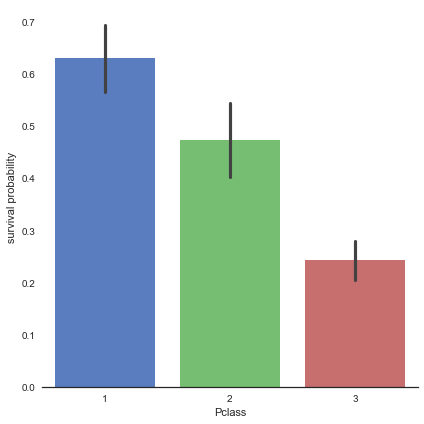

In [22]:
# Pclass
#Explore Pclass vs Survived
g = sns.factorplot(x="Pclass",y="Survived",data=df_train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

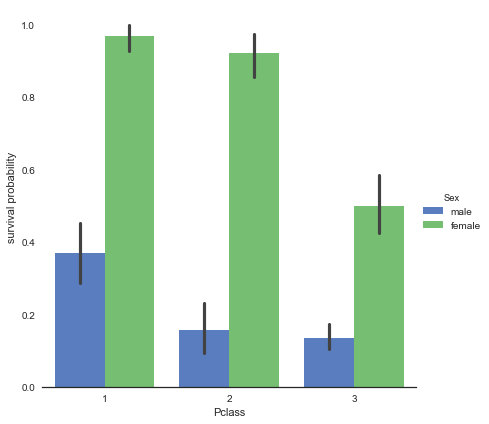

In [24]:
# Explore Pclass vs Survived by Sex
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=df_train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

The passenger survival is not the same in the 3 classes. First class passengers have more chance to survive than second class and third class passengers.

This trend is conserved when we look at both male and female passengers.

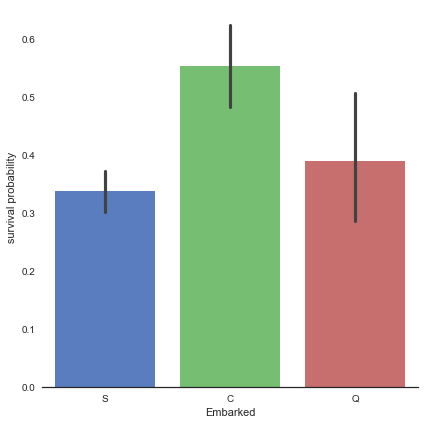

In [25]:
# Explore Embarked vs Survived 
g = sns.factorplot(x="Embarked", y="Survived",  data=df_train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

It seems that passenger coming from Cherbourg (C) have more chance to survive.

My hypothesis is that the proportion of first class passengers is higher for those who came from Cherbourg than Queenstown (Q), Southampton (S).

Let's see the Pclass distribution vs Embarked

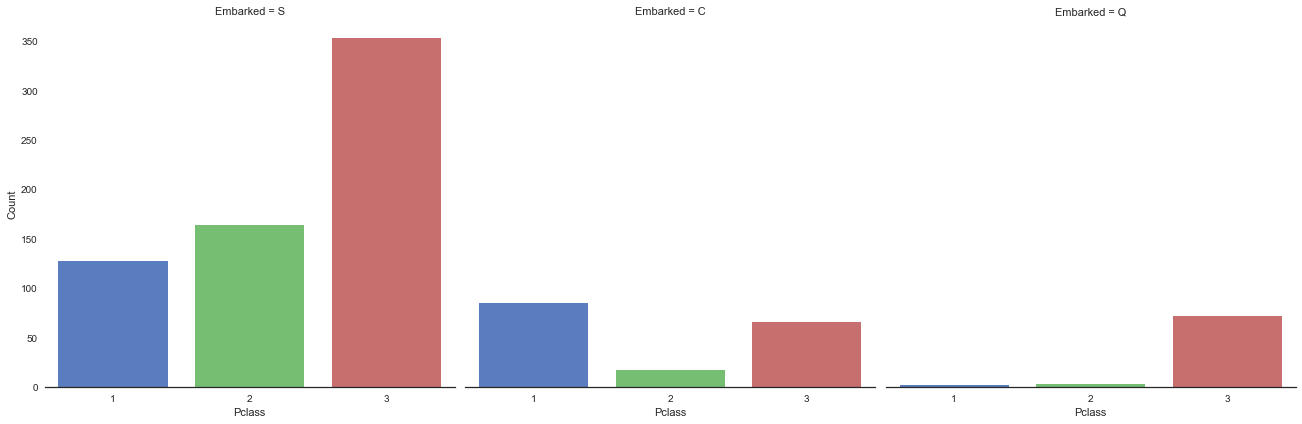

In [26]:
# Explore Pclass vs Embarked 
g = sns.factorplot("Pclass", col="Embarked",  data=df_train,
                   size=6, kind="count", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")

Indeed, the third class is the most frequent for passenger coming from Southampton (S) and Queenstown (Q), whereas Cherbourg passengers are mostly in first class which have the highest survival rate.

At this point, i can't explain why first class has an higher survival rate. My hypothesis is that first class passengers were prioritised during the evacuation due to their influence.

## Missing Values

In [27]:
##Training set has Age,Cabin,Embarked as null values.
##Test set has Age,Fare,Cabin as null values.
df_train.Age.isnull().sum()

177

In [28]:
df_train.Cabin.isnull().sum()

687

In [29]:
df_train.Embarked.isnull().sum()

2

In [30]:
df_test.Age.isnull().sum()

86

In [31]:
df_test.Fare.isnull().sum()

1

In [32]:
df_test.Cabin.isnull().sum()

327

In [33]:
df_all_corr = df_all.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()

In [34]:
df_all_corr

,level_0,level_1,0
0,Survived,Survived,1.000000
1,SibSp,SibSp,1.000000
2,Fare,Fare,1.000000
3,Parch,Parch,1.000000
4,Pclass,Pclass,1.000000
5,PassengerId,PassengerId,1.000000
6,Age,Age,1.000000
7,Fare,Pclass,0.693858
8,Pclass,Fare,0.693858
9,Age,Pclass,0.408106


In [35]:
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)

In [36]:
df_all_corr[df_all_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
6,Age,Age,1.000000
9,Age,Pclass,0.408106
21,Age,SibSp,0.243699
24,Age,Fare,0.188349
25,Age,Parch,0.150917
29,Age,Survived,0.077221
39,Age,PassengerId,0.028814


In [37]:
#we see that pclass is correlated with df_all and grouping pclass with sex we can insert median in the age column
# Filling the missing values in Age with the medians of Sex and Pclass groups
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [38]:
df_all

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,1.981001,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,4.266662,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,2.070022,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,3.972177,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,2.085672,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,NaN,S,2.085672,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,4.690430,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,1.981001,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,25.0,NaN,S,2.085672,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [39]:
df_all[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,4.382027,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,4.382027,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


#When I googled Stone, Mrs. George Nelson (Martha Evelyn), I found that she embarked from S (Southampton) with her maid Amelie Icard, in this page Martha Evelyn Stone: Titanic Survivor.

Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28.

In [40]:
# Filling the missing values in Embarked with S
df_all['Embarked'] = df_all['Embarked'].fillna('S')

In [41]:
df_all[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [42]:
df_all[df_all.Pclass==3]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,1.981001,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
2,26.0,NaN,S,2.070022,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
4,35.0,NaN,S,2.085672,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,25.0,NaN,Q,2.135148,"Moran, Mr. James",0,6,3,male,0,0.0,330877
7,2.0,NaN,S,3.048088,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
...,...,...,...,...,...,...,...,...,...,...,...,...
1303,28.0,NaN,S,2.050913,"Henriksson, Miss. Jenny Lovisa",0,1304,3,female,0,NaN,347086
1304,25.0,NaN,S,2.085672,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1306,38.5,NaN,S,1.981001,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,25.0,NaN,S,2.085672,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [43]:
df_avg=df_all[['Embarked','Fare','Pclass']].copy()

In [44]:
df_avg

,Embarked,Fare,Pclass
0,S,1.981001,3
1,C,4.266662,1
2,S,2.070022,3
3,S,3.972177,1
4,S,2.085672,3
...,...,...,...
1304,S,2.085672,3
1305,C,4.690430,1
1306,S,1.981001,3
1307,S,2.085672,3


In [45]:
df_res=df_avg[(df_avg['Pclass']==3) & (df_avg['Embarked']=='S')]

In [46]:
df_res

,Embarked,Fare,Pclass
0,S,1.981001,3
2,S,2.070022,3
4,S,2.085672,3
7,S,3.048088,3
8,S,2.409941,3
...,...,...,...
1300,S,2.622855,3
1303,S,2.050913,3
1304,S,2.085672,3
1306,S,1.981001,3


In [47]:
print(df_res["Fare"].mean())

2.4205134947656592


In [48]:
# Filling the missing values in Fare with df_res mean value.
df_all['Fare'] = df_all['Fare'].fillna(14.435422064777338)

In [49]:
df_all[df_all['Name']=='Storey, Mr. Thomas']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,0.0,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [50]:
df_all.Cabin.isnull().sum()

1014

In [51]:
df_all.Cabin

0        NaN
1        C85
2        NaN
3       C123
4        NaN
        ... 
1304     NaN
1305    C105
1306     NaN
1307     NaN
1308     NaN
Name: Cabin, Length: 1309, dtype: object

In [52]:
df_all

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,1.981001,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,4.266662,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,2.070022,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,3.972177,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,2.085672,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,NaN,S,2.085672,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,4.690430,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,1.981001,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,25.0,NaN,S,2.085672,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [53]:
#correlated with cabin columns
corr_matrix2=df_all.corr()

In [54]:
corr_matrix2

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.210016,-0.134239,0.020478,-0.451983,-0.204025,-0.058635
Fare,0.210016,1.000000,0.327117,0.016530,-0.693858,0.315925,0.331805
Parch,-0.134239,0.327117,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.020478,0.016530,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.451983,-0.693858,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.204025,0.315925,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.058635,0.331805,0.081629,-0.005007,-0.338481,-0.035322,1.000000


In [55]:
import pandas as pd
from dython.nominal import associations

In [56]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df_all)
categorical_features

['Cabin', 'Embarked', 'Name', 'Sex', 'Ticket']

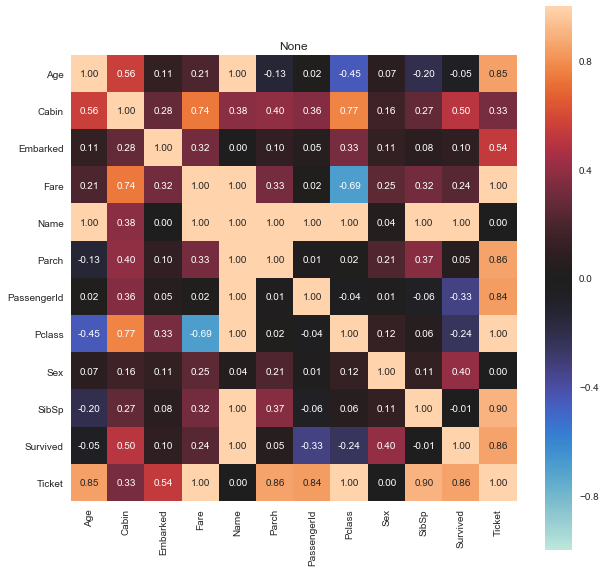

In [57]:
complete_correlation= associations(df_all, filename= 'complete_correlation.png', figsize=(10,10))

In [58]:
df_result1=df_all[['Fare','Pclass','Cabin']]

In [59]:
df_result1

,Fare,Pclass,Cabin
0,1.981001,3,NaN
1,4.266662,1,C85
2,2.070022,3,NaN
3,3.972177,1,C123
4,2.085672,3,NaN
...,...,...,...
1304,2.085672,3,NaN
1305,4.690430,1,C105
1306,1.981001,3,NaN
1307,2.085672,3,NaN


In [60]:
df_result1.Cabin.value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C78                4
F33                4
                  ..
E10                1
F                  1
A10                1
E60                1
D48                1
Name: Cabin, Length: 186, dtype: int64

In [61]:
df_all.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [62]:
df_all.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [63]:
df_all[df_all.SibSp==8]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
159,25.0,NaN,S,4.242046,"Sage, Master. Thomas Henry",2,160,3,male,8,0.0,CA. 2343
180,22.0,NaN,S,4.242046,"Sage, Miss. Constance Gladys",2,181,3,female,8,0.0,CA. 2343
201,25.0,NaN,S,4.242046,"Sage, Mr. Frederick",2,202,3,male,8,0.0,CA. 2343
324,25.0,NaN,S,4.242046,"Sage, Mr. George John Jr",2,325,3,male,8,0.0,CA. 2343
792,22.0,NaN,S,4.242046,"Sage, Miss. Stella Anna",2,793,3,female,8,0.0,CA. 2343
846,25.0,NaN,S,4.242046,"Sage, Mr. Douglas Bullen",2,847,3,male,8,0.0,CA. 2343
863,22.0,NaN,S,4.242046,"Sage, Miss. Dorothy Edith ""Dolly""",2,864,3,female,8,0.0,CA. 2343
1079,22.0,NaN,S,4.242046,"Sage, Miss. Ada",2,1080,3,female,8,NaN,CA. 2343
1251,14.5,NaN,S,4.242046,"Sage, Master. William Henry",2,1252,3,male,8,NaN,CA. 2343


In [64]:
df_all[df_all.SibSp==5]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
59,11.0,NaN,S,3.848018,"Goodwin, Master. William Frederick",2,60,3,male,5,0.0,CA 2144
71,16.0,NaN,S,3.848018,"Goodwin, Miss. Lillian Amy",2,72,3,female,5,0.0,CA 2144
386,1.0,NaN,S,3.848018,"Goodwin, Master. Sidney Leonard",2,387,3,male,5,0.0,CA 2144
480,9.0,NaN,S,3.848018,"Goodwin, Master. Harold Victor",2,481,3,male,5,0.0,CA 2144
683,14.0,NaN,S,3.848018,"Goodwin, Mr. Charles Edward",2,684,3,male,5,0.0,CA 2144
1031,10.0,NaN,S,3.848018,"Goodwin, Miss. Jessie Allis",2,1032,3,female,5,NaN,CA 2144


In [65]:
df_all[df_all.SibSp==4]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
16,2.0,NaN,Q,3.371597,"Rice, Master. Eugene",1,17,3,male,4,0.0,382652
50,7.0,NaN,S,3.681036,"Panula, Master. Juha Niilo",1,51,3,male,4,0.0,3101295
68,17.0,NaN,S,2.070022,"Andersson, Miss. Erna Alexandra",2,69,3,female,4,1.0,3101281
119,2.0,NaN,S,3.442819,"Andersson, Miss. Ellis Anna Maria",2,120,3,female,4,0.0,347082
164,1.0,NaN,S,3.681036,"Panula, Master. Eino Viljami",1,165,3,male,4,0.0,3101295
171,4.0,NaN,Q,3.371597,"Rice, Master. Arthur",1,172,3,male,4,0.0,382652
182,9.0,NaN,S,3.446410,"Asplund, Master. Clarence Gustaf Hugo",2,183,3,male,4,0.0,347077
233,5.0,NaN,S,3.446410,"Asplund, Miss. Lillian Gertrud",2,234,3,female,4,1.0,347077
261,3.0,NaN,S,3.446410,"Asplund, Master. Edvin Rojj Felix",2,262,3,male,4,1.0,347077
266,16.0,NaN,S,3.681036,"Panula, Mr. Ernesti Arvid",1,267,3,male,4,0.0,3101295


In [66]:
df_all[df_all.SibSp==3]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
7,2.0,NaN,S,3.048088,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
24,8.0,NaN,S,3.048088,"Palsson, Miss. Torborg Danira",1,25,3,female,3,0.0,349909
27,19.0,C23 C25 C27,S,5.572154,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950
63,4.0,NaN,S,3.328627,"Skoog, Master. Harald",2,64,3,male,3,0.0,347088
85,33.0,NaN,S,2.763170,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",0,86,3,female,3,1.0,3101278
88,23.0,C23 C25 C27,S,5.572154,"Fortune, Miss. Mabel Helen",2,89,1,female,3,1.0,19950
176,25.0,NaN,S,3.237372,"Lefebre, Master. Henry Forbes",1,177,3,male,3,0.0,4133
229,22.0,NaN,S,3.237372,"Lefebre, Miss. Mathilde",1,230,3,female,3,0.0,4133
341,24.0,C23 C25 C27,S,5.572154,"Fortune, Miss. Alice Elizabeth",2,342,1,female,3,1.0,19950
374,3.0,NaN,S,3.048088,"Palsson, Miss. Stina Viola",1,375,3,female,3,0.0,349909


In [67]:
# Filling the missing values in Cabin with C23 C25 C27
df_all['Cabin'] =df_all['Cabin'].fillna(df_all[df_all.SibSp==3]['Cabin'].mode()[0])

In [68]:
df_all[df_all.SibSp==3]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
7,2.0,C23 C25 C27,S,3.048088,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
24,8.0,C23 C25 C27,S,3.048088,"Palsson, Miss. Torborg Danira",1,25,3,female,3,0.0,349909
27,19.0,C23 C25 C27,S,5.572154,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950
63,4.0,C23 C25 C27,S,3.328627,"Skoog, Master. Harald",2,64,3,male,3,0.0,347088
85,33.0,C23 C25 C27,S,2.763170,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",0,86,3,female,3,1.0,3101278
88,23.0,C23 C25 C27,S,5.572154,"Fortune, Miss. Mabel Helen",2,89,1,female,3,1.0,19950
176,25.0,C23 C25 C27,S,3.237372,"Lefebre, Master. Henry Forbes",1,177,3,male,3,0.0,4133
229,22.0,C23 C25 C27,S,3.237372,"Lefebre, Miss. Mathilde",1,230,3,female,3,0.0,4133
341,24.0,C23 C25 C27,S,5.572154,"Fortune, Miss. Alice Elizabeth",2,342,1,female,3,1.0,19950
374,3.0,C23 C25 C27,S,3.048088,"Palsson, Miss. Stina Viola",1,375,3,female,3,0.0,349909


In [69]:
df_all[df_all.SibSp==2]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
38,18.00,C23 C25 C27,S,2.890372,"Vander Planke, Miss. Augusta Maria",0,39,3,female,2,0.0,345764
48,25.00,C23 C25 C27,C,3.076353,"Samaan, Mr. Youssef",0,49,3,male,2,0.0,2662
69,26.00,C23 C25 C27,S,2.159003,"Kink, Mr. Vincenz",0,70,3,male,2,0.0,315151
104,37.00,C23 C25 C27,S,2.070022,"Gustafsson, Mr. Anders Vilhelm",0,105,3,male,2,0.0,3101276
120,21.00,C23 C25 C27,S,4.297285,"Hickman, Mr. Stanley George",0,121,2,male,2,0.0,S.O.C. 14879
147,9.00,C23 C25 C27,S,3.537330,"Ford, Miss. Robina Maggie ""Ruby""",2,148,3,female,2,0.0,W./C. 6608
183,1.00,F4,S,3.663562,"Becker, Master. Richard F",1,184,2,male,2,1.0,230136
245,44.00,C78,Q,4.499810,"Minahan, Dr. William Edward",0,246,1,male,2,0.0,19928
301,25.00,C23 C25 C27,Q,3.146305,"McCoy, Mr. Bernard",0,302,3,male,2,1.0,367226
311,18.00,B57 B59 B63 B66,C,5.569775,"Ryerson, Miss. Emily Borie",2,312,1,female,2,1.0,PC 17608


In [70]:
# Filling the missing values in Cabin with C23 C25 C27
df_all['Cabin'] =df_all['Cabin'].fillna(df_all['Cabin'].mode()[0])

In [71]:
df_all.Cabin

0       C23 C25 C27
1               C85
2       C23 C25 C27
3              C123
4       C23 C25 C27
           ...     
1304    C23 C25 C27
1305           C105
1306    C23 C25 C27
1307    C23 C25 C27
1308    C23 C25 C27
Name: Cabin, Length: 1309, dtype: object

In [72]:
df_all.Cabin.value_counts()

C23 C25 C27        1020
G6                    5
B57 B59 B63 B66       5
C78                   4
F33                   4
                   ... 
E10                   1
F                     1
A10                   1
E60                   1
D48                   1
Name: Cabin, Length: 186, dtype: int64

In [73]:
df_all.isnull().sum()

Age              0
Cabin            0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

342 of 891 passengers survived and it is the 38.38% of the training set.
549 of 891 passengers didnt survive and it is the 61.62% of the training set.


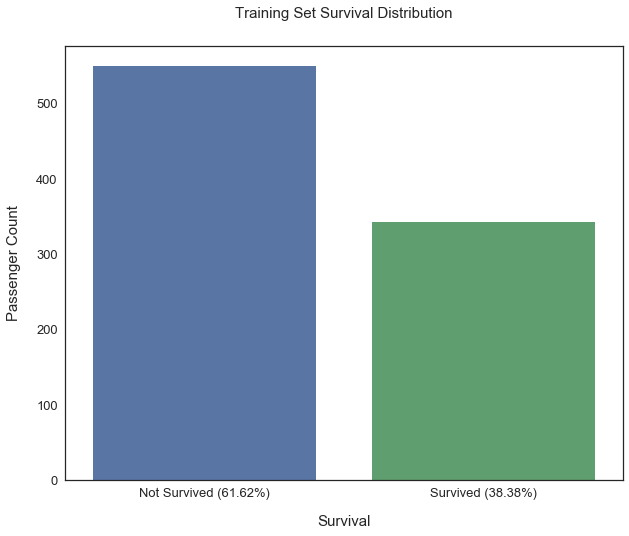

In [74]:
survived = df_train['Survived'].value_counts()[1]
not_survived = df_train['Survived'].value_counts()[0]
survived_per = survived / df_train.shape[0] * 100
not_survived_per = not_survived / df_train.shape[0] * 100
print('{} of {} passengers survived and it is the {:.2f}% of the training set.'.format(survived, df_train.shape[0], survived_per))
print('{} of {} passengers didnt survive and it is the {:.2f}% of the training set.'.format(not_survived, df_train.shape[0], not_survived_per))

plt.figure(figsize=(10, 8))
sns.countplot(df_train['Survived'])

plt.xlabel('Survival', size=15, labelpad=15)
plt.ylabel('Passenger Count', size=15, labelpad=15)
plt.xticks((0, 1), ['Not Survived ({0:.2f}%)'.format(not_survived_per), 'Survived ({0:.2f}%)'.format(survived_per)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Training Set Survival Distribution', size=15, y=1.05)

plt.show()

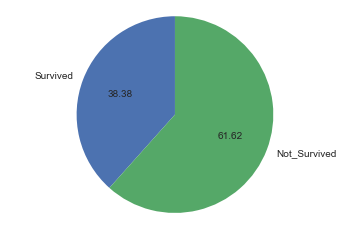

In [75]:
#This is a balanced dataset
pieLabels='Survived', 'Not_Survived'
survival_share=[342,549]
figureObject, axesObject = plt.subplots()
axesObject.pie(survival_share,labels=pieLabels,autopct='%1.2f',startangle=90)
axesObject.axis('equal')
plt.show()

## Correlation Matrix Of Complete Dataset

In [76]:
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
Age,1.00,0.56,0.11,0.21,1.00,-0.13,0.02,-0.45,0.07,-0.20,-0.05,0.85
Cabin,0.56,1.00,0.28,0.74,0.38,0.40,0.36,0.77,0.16,0.27,0.50,0.33
Embarked,0.11,0.28,1.00,0.32,0.00,0.10,0.05,0.33,0.11,0.08,0.10,0.54
Fare,0.21,0.74,0.32,1.00,1.00,0.33,0.02,-0.69,0.25,0.32,0.24,1.00
Name,1.00,0.38,0.00,1.00,1.00,1.00,1.00,1.00,0.04,1.00,1.00,0.00
Parch,-0.13,0.40,0.10,0.33,1.00,1.00,0.01,0.02,0.21,0.37,0.05,0.86
PassengerId,0.02,0.36,0.05,0.02,1.00,0.01,1.00,-0.04,0.01,-0.06,-0.33,0.84
Pclass,-0.45,0.77,0.33,-0.69,1.00,0.02,-0.04,1.00,0.12,0.06,-0.24,1.00
Sex,0.07,0.16,0.11,0.25,0.04,0.21,0.01,0.12,1.00,0.11,0.40,0.00
SibSp,-0.20,0.27,0.08,0.32,1.00,0.37,-0.06,0.06,0.11,1.00,-0.01,0.90


In [77]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [78]:
df_test.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


In [79]:
df_all.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.210016,-0.134239,0.020478,-0.451983,-0.204025,-0.058635
Fare,0.210016,1.000000,0.327117,0.016530,-0.693858,0.315925,0.331805
Parch,-0.134239,0.327117,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.020478,0.016530,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.451983,-0.693858,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.204025,0.315925,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.058635,0.331805,0.081629,-0.005007,-0.338481,-0.035322,1.000000


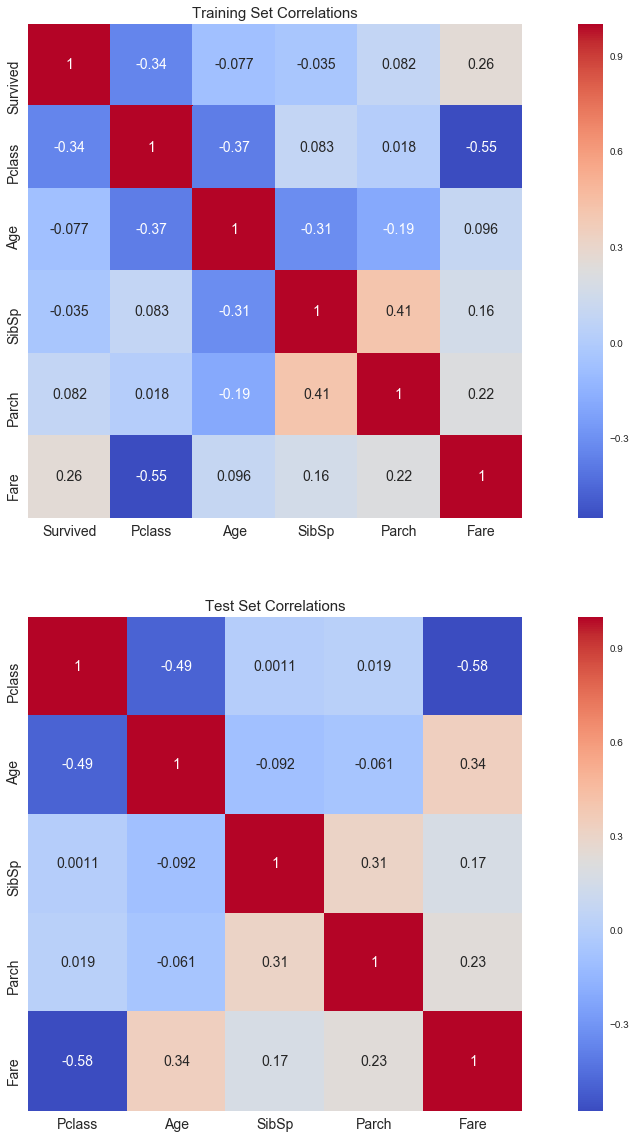

In [80]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))

sns.heatmap(df_train.drop(['PassengerId'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
sns.heatmap(df_test.drop(['PassengerId'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Training Set Correlations', size=15)
axs[1].set_title('Test Set Correlations', size=15)

plt.show()

In [81]:
df_all.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [82]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [83]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [84]:
df_all

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,C23 C25 C27,S,1.981001,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,4.266662,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,C23 C25 C27,S,2.070022,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,3.972177,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,C23 C25 C27,S,2.085672,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,C23 C25 C27,S,2.085672,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,4.690430,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,C23 C25 C27,S,1.981001,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,25.0,C23 C25 C27,S,2.085672,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


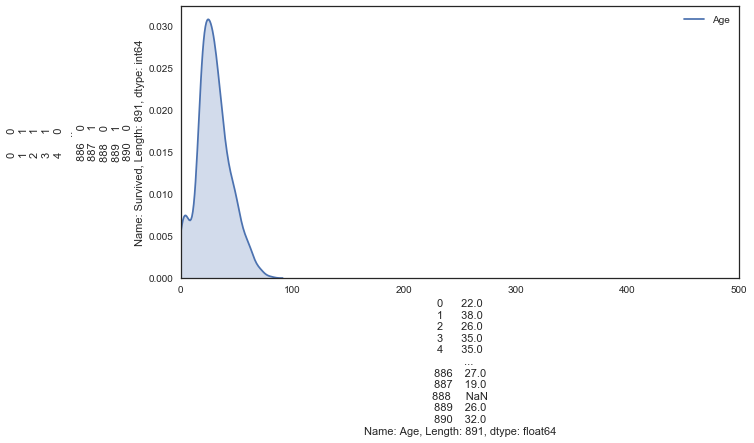

In [85]:
#continuous feature age distribution in train dataset.
plt.figure(figsize=(10,5))
plt.xlim(0,500)
plt.xlabel(df_train['Age'])
plt.ylabel(df_train['Survived'])
sns.kdeplot(df_train['Age'],shade=True)
plt.show()

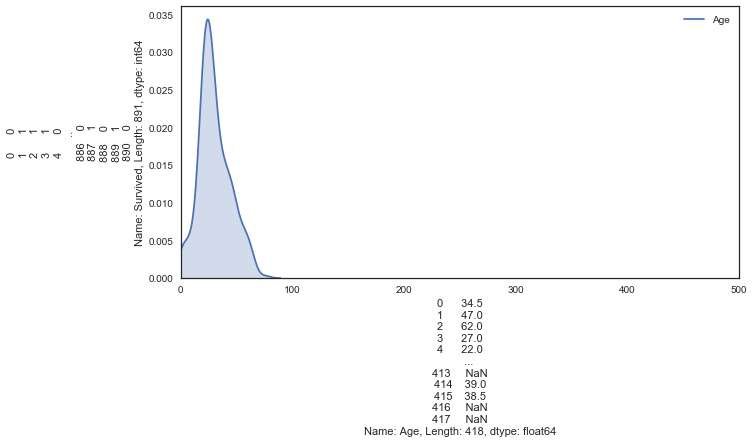

In [86]:
#continuous feature age distribution in test dataset.
plt.figure(figsize=(10,5))
plt.xlim(0,500)
plt.xlabel(df_test['Age'])
plt.ylabel(df_train['Survived'])
sns.kdeplot(df_test['Age'],shade=True)
plt.show()

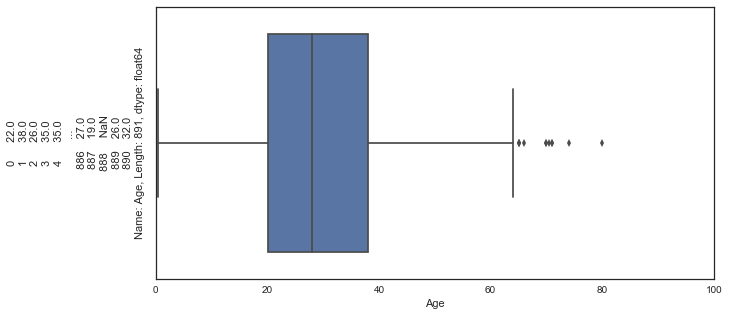

In [87]:
plt.figure(figsize=(10,5))
plt.xlim(0,100)
plt.ylabel(df_train['Age'])
sns.boxplot(x=df_train['Age'])
plt.show()

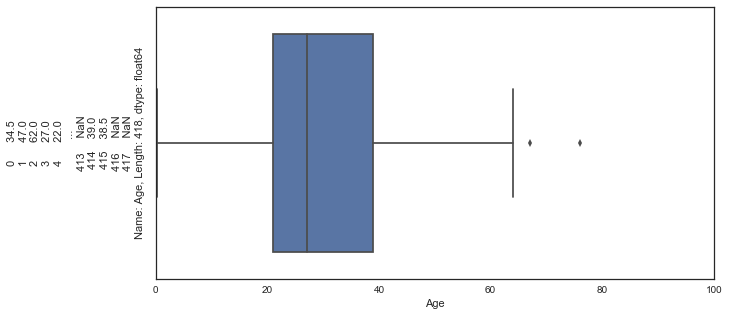

In [88]:
plt.figure(figsize=(10,5))
plt.xlim(0,100)
plt.ylabel(df_test['Age'])
sns.boxplot(x=df_test['Age'])
plt.show()

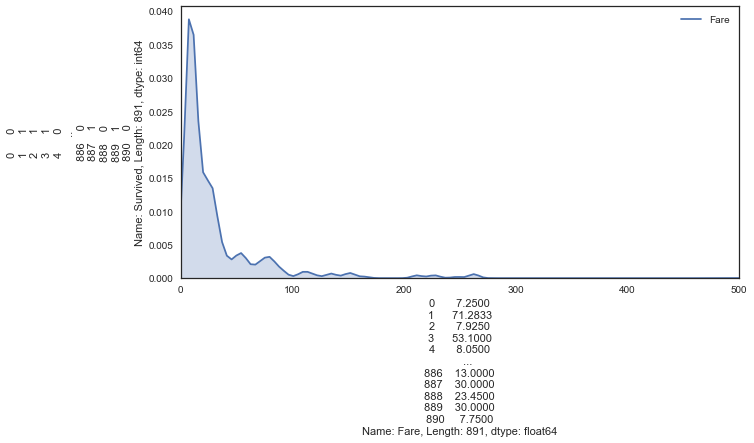

In [89]:
#continuous feature fare distribution in train dataset.
plt.figure(figsize=(10,5))
plt.xlim(0,500)
plt.xlabel(df_train['Fare'])
plt.ylabel(df_train['Survived'])
sns.kdeplot(df_train['Fare'],shade=True)
plt.show()

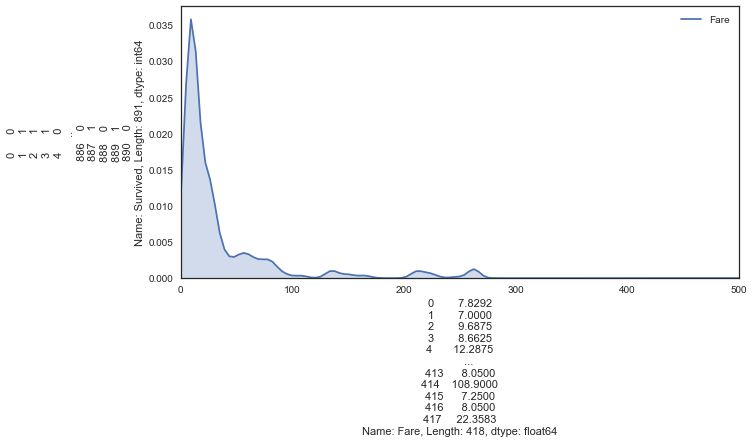

In [90]:
plt.figure(figsize=(10,5))
plt.xlim(0,500)
plt.xlabel(df_test['Fare'])
plt.ylabel(df_train['Survived'])
sns.kdeplot(df_test['Fare'],shade=True)
plt.show()

We can see that both continuous features age and fare have many bumps along.Moreover the bumps are more on training data rather than test data.Decision tree is good for model if we want linear algorithms to the model we have to standarize the data.

In [91]:
## Detect outliers from df_all and remove them.
# Outlier detection 
from collections import Counter
def detect_outliers(df_all1,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df_all1[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df_all1[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df_all1[(df_all[col] < Q1 - outlier_step) | (df_all1[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(df_all,2,["Age","SibSp","Parch","Fare"])

In [92]:
df_all.loc[Outliers_to_drop] 

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
438,64.0,C23 C25 C27,S,5.572154,"Fortune, Mr. Mark",4,439,1,male,1,0.0,19950
960,60.0,C23 C25 C27,S,5.572154,"Fortune, Mrs. Mark (Mary McDougald)",4,961,1,female,1,NaN,19950
1033,61.0,B57 B59 B63 B66,C,5.569775,"Ryerson, Mr. Arthur Larned",3,1034,1,male,1,NaN,PC 17608
1234,58.0,B51 B53 B55,C,6.238967,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,NaN,PC 17755
27,19.0,C23 C25 C27,S,5.572154,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950
88,23.0,C23 C25 C27,S,5.572154,"Fortune, Miss. Mabel Helen",2,89,1,female,3,1.0,19950
341,24.0,C23 C25 C27,S,5.572154,"Fortune, Miss. Alice Elizabeth",2,342,1,female,3,1.0,19950
944,28.0,C23 C25 C27,S,5.572154,"Fortune, Miss. Ethel Flora",2,945,1,female,3,NaN,19950


In [93]:
df_all.loc[Outliers_to_drop].shape

(8, 12)

In [94]:
# Drop outliers
df_all.drop(Outliers_to_drop, axis = 0, inplace=False).reset_index(drop=True)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,C23 C25 C27,S,1.981001,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,4.266662,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,C23 C25 C27,S,2.070022,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,3.972177,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,C23 C25 C27,S,2.085672,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1296,25.0,C23 C25 C27,S,2.085672,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1297,39.0,C105,C,4.690430,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1298,38.5,C23 C25 C27,S,1.981001,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1299,25.0,C23 C25 C27,S,2.085672,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


## Conclusion
Most of the features are correlated with each other. This relationship can be used to create new features with feature transformation and feature interaction. Target encoding could be very useful as well because of the high correlations with Survived feature.

Split points and spikes are visible in continuous features. They can be captured easily with a decision tree model, but linear models may not be able to spot them.

Categorical features have very distinct distributions with different survival rates. Those features can be one-hot encoded. Some of those features may be combined with each other to make new features.

## Feature engineering

### Name/Title

In [95]:
df_all["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

The Name feature contains information on passenger's title.

Since some passenger with distingused title may be preferred during the evacuation, it is interesting to add them to the model.

In [96]:
 # Get Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in df_all["Name"]]
df_all["Title"] = pd.Series(dataset_title)
df_all["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

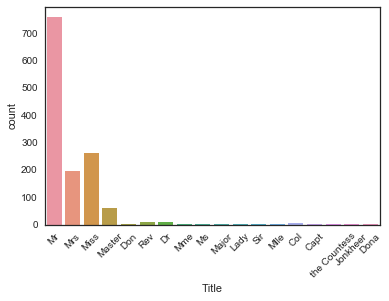

In [97]:
g = sns.countplot(x="Title",data=df_all)
g = plt.setp(g.get_xticklabels(), rotation=45) 

There is 17 titles in the dataset, most of them are very rare and we can group them in 4 categories.

In [98]:
df_all

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,C23 C25 C27,S,1.981001,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,4.266662,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,C23 C25 C27,S,2.070022,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,3.972177,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,C23 C25 C27,S,2.085672,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,C23 C25 C27,S,2.085672,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,Mr
1305,39.0,C105,C,4.690430,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,Dona
1306,38.5,C23 C25 C27,S,1.981001,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,Mr
1307,25.0,C23 C25 C27,S,2.085672,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,Mr


In [99]:
df_all["Title"] = df_all["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [100]:
df_all["Title"] = df_all["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
df_all["Title"] = df_all["Title"].astype(int)

In [101]:
df_all

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,C23 C25 C27,S,1.981001,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2
1,38.0,C85,C,4.266662,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1
2,26.0,C23 C25 C27,S,2.070022,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,3.972177,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1
4,35.0,C23 C25 C27,S,2.085672,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,C23 C25 C27,S,2.085672,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,2
1305,39.0,C105,C,4.690430,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,3
1306,38.5,C23 C25 C27,S,1.981001,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,2
1307,25.0,C23 C25 C27,S,2.085672,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,2


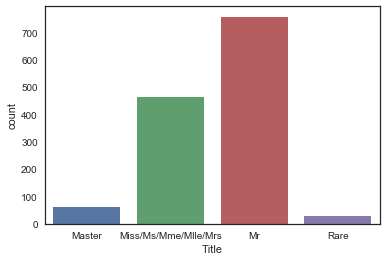

In [102]:
g = sns.countplot(df_all["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

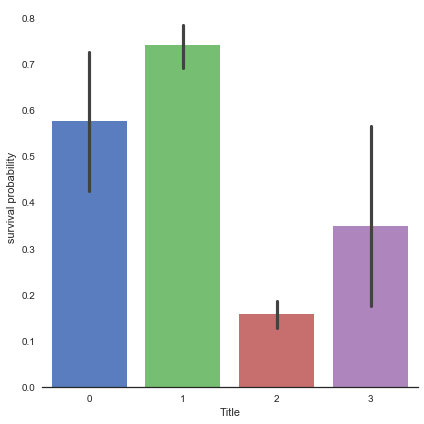

In [103]:
#performance of title feture with survived feature
import seaborn as sns
g = sns.factorplot(x="Title",y="Survived",data=df_all,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

"Women and children first"

It is interesting to note that passengers with rare title have more chance to survive than men.

In [104]:
# Drop Name variable
df_all.drop(labels = ["Name"], axis = 1, inplace = True)

In [105]:
df_all

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,C23 C25 C27,S,1.981001,0,1,3,male,1,0.0,A/5 21171,2
1,38.0,C85,C,4.266662,0,2,1,female,1,1.0,PC 17599,1
2,26.0,C23 C25 C27,S,2.070022,0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,3.972177,0,4,1,female,1,1.0,113803,1
4,35.0,C23 C25 C27,S,2.085672,0,5,3,male,0,0.0,373450,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,C23 C25 C27,S,2.085672,0,1305,3,male,0,NaN,A.5. 3236,2
1305,39.0,C105,C,4.690430,0,1306,1,female,0,NaN,PC 17758,3
1306,38.5,C23 C25 C27,S,1.981001,0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,2
1307,25.0,C23 C25 C27,S,2.085672,0,1308,3,male,0,NaN,359309,2


 Family size
We can imagine that large families will have more difficulties to evacuate, looking for theirs sisters/brothers/parents during the evacuation. So, i choosed to create a "Fize" (family size) feature which is the sum of SibSp , Parch and 1 (including the passenger).

In [106]:
# Create a family size descriptor from SibSp and Parch
df_all["Fsize"] = df_all["SibSp"] + df_all["Parch"] + 1

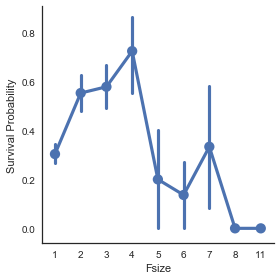

In [107]:
g = sns.factorplot(x="Fsize",y="Survived",data = df_all)
g = g.set_ylabels("Survival Probability")

The family size seems to play an important role, survival probability is worst for large families.

Additionally, i decided to created 4 categories of family size.

In [108]:
# Create new feature of family size
df_all['Single'] = df_all['Fsize'].map(lambda s: 1 if s == 1 else 0)
df_all['SmallF'] = df_all['Fsize'].map(lambda s: 1 if  s == 2  else 0)
df_all['MedF'] = df_all['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
df_all['LargeF'] = df_all['Fsize'].map(lambda s: 1 if s >= 5 else 0)

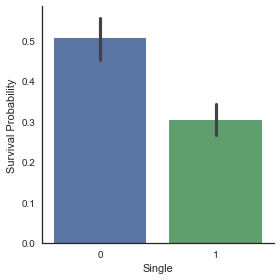

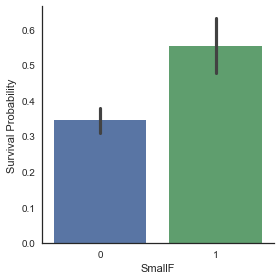

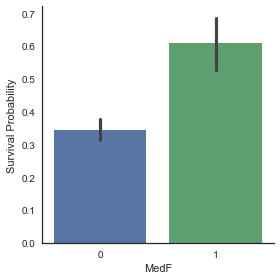

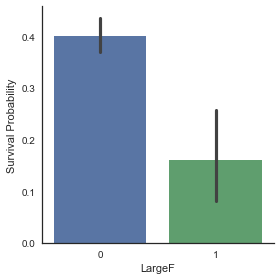

In [109]:
g = sns.factorplot(x="Single",y="Survived",data=df_all,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="SmallF",y="Survived",data=df_all,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="MedF",y="Survived",data=df_all,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="LargeF",y="Survived",data=df_all,kind="bar")
g = g.set_ylabels("Survival Probability")

Factorplots of family size categories show that Small and Medium families have more chance to survive than single passenger and large families.

In [110]:
# convert to indicator values Title and Embarked 
df_all = pd.get_dummies(df_all, columns = ["Title"])
df_all = pd.get_dummies(df_all, columns = ["Embarked"], prefix="Em")

In [111]:
df_all.Cabin.value_counts()

C23 C25 C27        1020
G6                    5
B57 B59 B63 B66       5
C78                   4
F33                   4
                   ... 
E10                   1
F                     1
A10                   1
E60                   1
D48                   1
Name: Cabin, Length: 186, dtype: int64

In [112]:
# Replace the Cabin number by the type of cabin 'X' if not
df_all["Cabin"] = pd.Series([i[0] for i in df_all['Cabin']])

In [113]:
df_all

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,...,SmallF,MedF,LargeF,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,22.0,C,1.981001,0,1,3,male,1,0.0,A/5 21171,...,1,0,0,0,0,1,0,0,0,1
1,38.0,C,4.266662,0,2,1,female,1,1.0,PC 17599,...,1,0,0,0,1,0,0,1,0,0
2,26.0,C,2.070022,0,3,3,female,0,1.0,STON/O2. 3101282,...,0,0,0,0,1,0,0,0,0,1
3,35.0,C,3.972177,0,4,1,female,1,1.0,113803,...,1,0,0,0,1,0,0,0,0,1
4,35.0,C,2.085672,0,5,3,male,0,0.0,373450,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,C,2.085672,0,1305,3,male,0,NaN,A.5. 3236,...,0,0,0,0,0,1,0,0,0,1
1305,39.0,C,4.690430,0,1306,1,female,0,NaN,PC 17758,...,0,0,0,0,0,0,1,1,0,0
1306,38.5,C,1.981001,0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,...,0,0,0,0,0,1,0,0,0,1
1307,25.0,C,2.085672,0,1308,3,male,0,NaN,359309,...,0,0,0,0,0,1,0,0,0,1


In [114]:
df_all.Cabin.value_counts()

C    1108
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

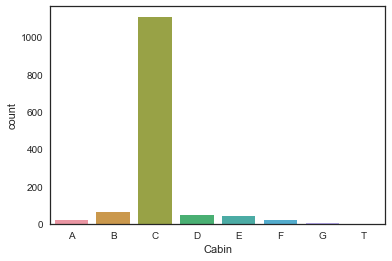

In [115]:
g = sns.countplot(df_all["Cabin"],order=['A','B','C','D','E','F','G','T'])


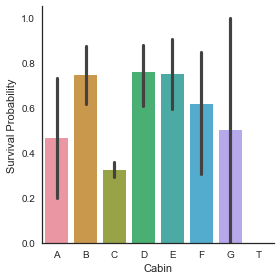

In [116]:
g = sns.factorplot(y="Survived",x="Cabin",data=df_all,kind="bar",order=['A','B','C','D','E','F','G','T'])
g = g.set_ylabels("Survival Probability")

In [117]:
df_all= pd.get_dummies(df_all, columns = ["Cabin"],prefix="Cabin")

In [118]:
df_all

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fsize,...,Em_Q,Em_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,22.0,1.981001,0,1,3,male,1,0.0,A/5 21171,2,...,0,1,0,0,1,0,0,0,0,0
1,38.0,4.266662,0,2,1,female,1,1.0,PC 17599,2,...,0,0,0,0,1,0,0,0,0,0
2,26.0,2.070022,0,3,3,female,0,1.0,STON/O2. 3101282,1,...,0,1,0,0,1,0,0,0,0,0
3,35.0,3.972177,0,4,1,female,1,1.0,113803,2,...,0,1,0,0,1,0,0,0,0,0
4,35.0,2.085672,0,5,3,male,0,0.0,373450,1,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,2.085672,0,1305,3,male,0,NaN,A.5. 3236,1,...,0,1,0,0,1,0,0,0,0,0
1305,39.0,4.690430,0,1306,1,female,0,NaN,PC 17758,1,...,0,0,0,0,1,0,0,0,0,0
1306,38.5,1.981001,0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,1,...,0,1,0,0,1,0,0,0,0,0
1307,25.0,2.085672,0,1308,3,male,0,NaN,359309,1,...,0,1,0,0,1,0,0,0,0,0


In [119]:
#Ticket
df_all["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [120]:
## Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X. 

Ticket = []
for i in list(df_all.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
df_all["Ticket"] = Ticket

In [121]:
df_all["Ticket"]

0            A5
1            PC
2        STONO2
3             X
4             X
         ...   
1304         A5
1305         PC
1306    SOTONOQ
1307          X
1308          X
Name: Ticket, Length: 1309, dtype: object

In [122]:
df_all= pd.get_dummies(df_all, columns = ["Ticket"], prefix="T")

In [123]:
df_all

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Fsize,Single,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X
0,22.0,1.981001,0,1,3,male,1,0.0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,4.266662,0,2,1,female,1,1.0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,2.070022,0,3,3,female,0,1.0,1,1,...,0,0,0,0,1,0,0,0,0,0
3,35.0,3.972177,0,4,1,female,1,1.0,2,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,2.085672,0,5,3,male,0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,2.085672,0,1305,3,male,0,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
1305,39.0,4.690430,0,1306,1,female,0,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
1306,38.5,1.981001,0,1307,3,male,0,NaN,1,1,...,0,1,0,0,0,0,0,0,0,0
1307,25.0,2.085672,0,1308,3,male,0,NaN,1,1,...,0,0,0,0,0,0,0,0,0,1


In [124]:
# convert Sex into categorical value 0 for male and 1 for female
df_all["Sex"] = df_all["Sex"].map({"male": 0, "female":1})

In [125]:
df_all

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Fsize,Single,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X
0,22.0,1.981001,0,1,3,0,1,0.0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,4.266662,0,2,1,1,1,1.0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,2.070022,0,3,3,1,0,1.0,1,1,...,0,0,0,0,1,0,0,0,0,0
3,35.0,3.972177,0,4,1,1,1,1.0,2,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,2.085672,0,5,3,0,0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,2.085672,0,1305,3,0,0,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
1305,39.0,4.690430,0,1306,1,1,0,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
1306,38.5,1.981001,0,1307,3,0,0,NaN,1,1,...,0,1,0,0,0,0,0,0,0,0
1307,25.0,2.085672,0,1308,3,0,0,NaN,1,1,...,0,0,0,0,0,0,0,0,0,1


In [126]:
df_all.describe()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Fsize,Single,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.261398,2.908367,0.385027,655.000000,2.294882,0.355997,0.498854,0.383838,1.883881,0.603514,...,0.002292,0.018335,0.000764,0.010695,0.005348,0.000764,0.001528,0.011459,0.003056,0.731092
std,13.218275,1.007083,0.865560,378.020061,0.837836,0.478997,1.041658,0.486592,1.583639,0.489354,...,0.047836,0.134210,0.027639,0.102902,0.072959,0.027639,0.039073,0.106473,0.055216,0.443561
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,2.066331,0.000000,328.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.670985,0.000000,655.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,36.000000,3.442819,0.000000,982.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,80.000000,6.238967,9.000000,1309.000000,3.000000,1.000000,8.000000,1.000000,11.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 65 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Fare         1309 non-null   float64
 2   Parch        1309 non-null   int64  
 3   PassengerId  1309 non-null   int64  
 4   Pclass       1309 non-null   int64  
 5   Sex          1309 non-null   int64  
 6   SibSp        1309 non-null   int64  
 7   Survived     891 non-null    float64
 8   Fsize        1309 non-null   int64  
 9   Single       1309 non-null   int64  
 10  SmallF       1309 non-null   int64  
 11  MedF         1309 non-null   int64  
 12  LargeF       1309 non-null   int64  
 13  Title_0      1309 non-null   uint8  
 14  Title_1      1309 non-null   uint8  
 15  Title_2      1309 non-null   uint8  
 16  Title_3      1309 non-null   uint8  
 17  Em_C         1309 non-null   uint8  
 18  Em_Q         1309 non-null   uint8  
 19  Em_S  

In [128]:
df_all.isnull().sum()

Age            0
Fare           0
Parch          0
PassengerId    0
Pclass         0
              ..
T_STONOQ       0
T_SWPP         0
T_WC           0
T_WEP          0
T_X            0
Length: 65, dtype: int64

In [129]:
# Drop useless variables 
df_all.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [130]:
df_all

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,Fsize,Single,SmallF,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X
0,22.0,1.981001,0,3,0,1,0.0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
1,38.0,4.266662,0,1,1,1,1.0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
2,26.0,2.070022,0,3,1,0,1.0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,35.0,3.972177,0,1,1,1,1.0,2,0,1,...,0,0,0,0,0,0,0,0,0,1
4,35.0,2.085672,0,3,0,0,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,2.085672,0,3,0,0,NaN,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1305,39.0,4.690430,0,1,1,0,NaN,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1306,38.5,1.981001,0,3,0,0,NaN,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1307,25.0,2.085672,0,3,0,0,NaN,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [131]:
df_all= pd.get_dummies(df_all, columns = ["Pclass"],prefix="Pc")

In [132]:
df_all

,Age,Fare,Parch,Sex,SibSp,Survived,Fsize,Single,SmallF,MedF,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,22.0,1.981001,0,0,1,0.0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,4.266662,0,1,1,1.0,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,26.0,2.070022,0,1,0,1.0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,35.0,3.972177,0,1,1,1.0,2,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,35.0,2.085672,0,0,0,0.0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,2.085672,0,0,0,NaN,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1305,39.0,4.690430,0,1,0,NaN,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1306,38.5,1.981001,0,0,0,NaN,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1307,25.0,2.085672,0,0,0,NaN,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [133]:
df_all.corr()

,Age,Fare,Parch,Sex,SibSp,Survived,Fsize,Single,SmallF,MedF,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
Age,1.000000,0.210016,-0.134239,-0.074529,-0.204025,-0.058635,-0.207570,0.112874,0.096009,-0.141541,...,-0.005429,-0.019684,0.005731,0.033272,-0.031464,0.085848,-0.037271,0.434773,0.008966,-0.383537
Fare,0.210016,1.000000,0.327117,0.252123,0.315925,0.331805,0.386594,-0.476040,0.263950,0.210524,...,-0.088942,-0.046637,-0.022596,-0.021643,0.003273,0.070385,-0.153170,0.682740,-0.018537,-0.575544
Parch,-0.134239,0.327117,1.000000,0.213125,0.373587,0.081629,0.792296,-0.549022,-0.088528,0.418490,...,-0.046269,-0.032629,-0.012304,-0.017408,0.118004,0.023354,-0.084573,-0.013033,-0.010057,0.019521
Sex,-0.074529,0.252123,0.213125,1.000000,0.109609,0.543351,0.188583,-0.284537,0.163546,0.159387,...,-0.077305,0.076743,-0.020558,-0.029084,0.039876,0.016651,0.004717,0.107371,0.028862,-0.116562
SibSp,-0.204025,0.315925,0.373587,0.109609,1.000000,-0.035322,0.861952,-0.591077,0.125727,0.197469,...,-0.042681,0.005111,-0.013247,-0.018741,0.031138,0.013353,-0.078437,-0.034256,-0.052419,0.072610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_WEP,0.085848,0.070385,0.023354,0.016651,0.013353,-0.006036,0.021548,-0.068305,0.046230,0.052978,...,-0.005756,-0.004059,-0.001531,-0.002166,-0.005961,1.000000,-0.091287,0.096730,-0.028683,-0.060183
T_X,-0.037271,-0.153170,-0.084573,0.004717,-0.078437,0.001492,-0.097817,0.029717,0.014336,-0.022324,...,-0.171441,-0.120901,-0.045591,-0.064500,-0.177526,-0.091287,1.000000,-0.048528,-0.078091,0.106004
Pc_1,0.434773,0.682740,-0.013033,0.107371,-0.034256,0.285904,-0.029656,-0.126551,0.212444,-0.009046,...,-0.059510,-0.041967,-0.015826,-0.022389,-0.061623,0.096730,-0.048528,1.000000,-0.296526,-0.622172
Pc_2,0.008966,-0.018537,-0.010057,0.028862,-0.052419,0.093349,-0.039976,-0.035075,0.011068,0.115220,...,-0.053868,-0.037988,-0.014325,0.075505,0.032085,-0.028683,-0.078091,-0.296526,1.000000,-0.563180


## Modelling

In [134]:
train_len=len(df_train)

In [135]:
train_len

891

In [136]:
test_len=len(df_test)

In [137]:
## Separate train dataset and test datas
train = df_all[:train_len]
test = df_all[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)

In [138]:
train

,Age,Fare,Parch,Sex,SibSp,Survived,Fsize,Single,SmallF,MedF,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,22.0,1.981001,0,0,1,0.0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,4.266662,0,1,1,1.0,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,26.0,2.070022,0,1,0,1.0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,35.0,3.972177,0,1,1,1.0,2,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,35.0,2.085672,0,0,0,0.0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,2.564949,0,0,0,0.0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
887,19.0,3.401197,0,1,0,1.0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
888,22.0,3.154870,2,1,1,0.0,4,0,0,1,...,0,0,0,0,1,0,0,0,0,1
889,26.0,3.401197,0,0,0,1.0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [139]:
df_all

,Age,Fare,Parch,Sex,SibSp,Survived,Fsize,Single,SmallF,MedF,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,22.0,1.981001,0,0,1,0.0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,4.266662,0,1,1,1.0,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,26.0,2.070022,0,1,0,1.0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,35.0,3.972177,0,1,1,1.0,2,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,35.0,2.085672,0,0,0,0.0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,2.085672,0,0,0,NaN,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1305,39.0,4.690430,0,1,0,NaN,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1306,38.5,1.981001,0,0,0,NaN,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1307,25.0,2.085672,0,0,0,NaN,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [140]:
train.isnull().sum()

Age      0
Fare     0
Parch    0
Sex      0
SibSp    0
        ..
T_WEP    0
T_X      0
Pc_1     0
Pc_2     0
Pc_3     0
Length: 66, dtype: int64

In [141]:
test.isnull().sum()

Age      0
Fare     0
Parch    0
Sex      0
SibSp    0
        ..
T_WEP    0
T_X      0
Pc_1     0
Pc_2     0
Pc_3     0
Length: 65, dtype: int64

In [142]:
## Separate train features and label 
train["Survived"] = train["Survived"].astype(int)
Y_train = train["Survived"]
X_train = train.drop(labels = ["Survived"],axis = 1)

In [143]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int32

Simple modeling
Cross validate models
I compared 10 popular classifiers and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure.

SVC
Decision Tree
AdaBoost
Random Forest
Extra Trees
Gradient Boosting
Multiple layer perceprton (neural network)
KNN
Logistic regression
Linear Discriminant Analysis

In [144]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

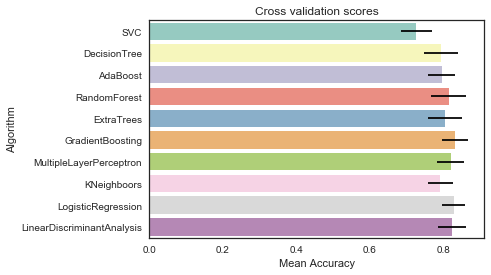

In [145]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


#Based on my data I will choose Random Forest,Gradient Boosting,Logistic regression,LinearDiscriminantAnalysis,MultipleLayerPerceptron


6.1.2 Hyperparameter tunning for best models
I performed a grid search optimization for Logistic regression, LinearDiscriminantAnalysis , RandomForest, GradientBoosting and MultipleLayerPerceptrons.

I set the "n_jobs" parameter to 4 since i have 4 cpu . The computation time is clearly reduced.

But be carefull, this step can take a long time, i took me 15 min in total on 4 cpu.

In [153]:
#Logistic Regression
std_slc = StandardScaler()
pca = decomposition.PCA()
logistic_Reg = linear_model.LogisticRegression()
pipe = Pipeline(steps=[('std_slc', std_slc),
                       ('pca', pca),
                       ('logistic_Reg', logistic_Reg)])
n_components = list(range(1,X_train.shape[1]+1,1))
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
parameters = dict(pca__n_components=n_components,
                  logistic_Reg__C=C,
                  logistic_Reg__penalty=penalty)
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, Y_train)


GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic_Reg', LogisticRegression())]),
             param_grid={'logistic_Reg__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e...
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logistic_Reg__penalty': ['l1', 'l2'],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                        

In [154]:
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])


Best Penalty: l2
Best C: 0.009102981779915217
Best Number Of Components: 44

LogisticRegression(C=0.009102981779915217)


In [155]:
clf_GS.best_score_

0.8350323269097985

In [184]:
clf_LR=clf_GS.best_estimator_

In [156]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8395380774032459

In [157]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs=-1, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.8339325842696628

In [165]:
# LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
scores = cross_val_score(clf, X_train, Y_train, scoring='accuracy', cv=kfold, n_jobs=-1)

In [ ]:
clf_LDA=clf.best_estimator_

In [167]:
from numpy import mean
from numpy import std
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.823 (0.038)


In [168]:
#MultiLayeredPerceptrons
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, Y_train) # X is train samples and y is the corresponding labels

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [186]:
clf_MLA=clf.best_estimator_

In [169]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}


In [170]:
print(clf.best_score_)

0.8282781997363632


6.1.3 Plot learning curves
Learning curves are a good way to see the overfitting effect on the training set and the effect of the training size on the accuracy.

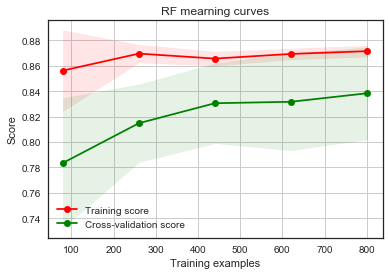

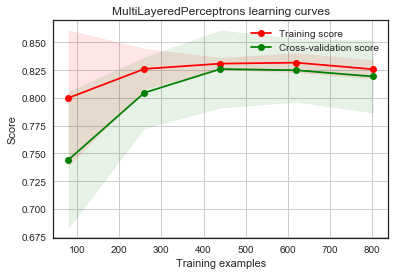

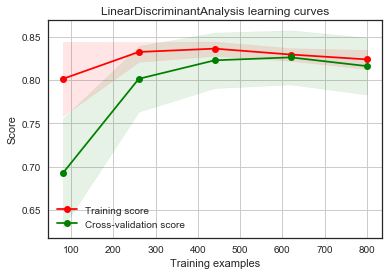

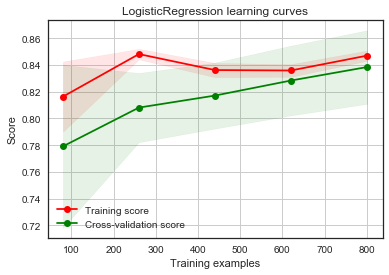

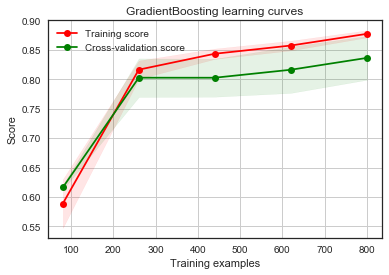

In [171]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(clf.best_estimator_,"MultiLayeredPerceptrons learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(clf.best_estimator_,"LinearDiscriminantAnalysis learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(clf_GS.best_estimator_,"LogisticRegression learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

#RandomForest and GradientBoosting curves tend to overfit a little bit.

In [178]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [179]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.061 seconds


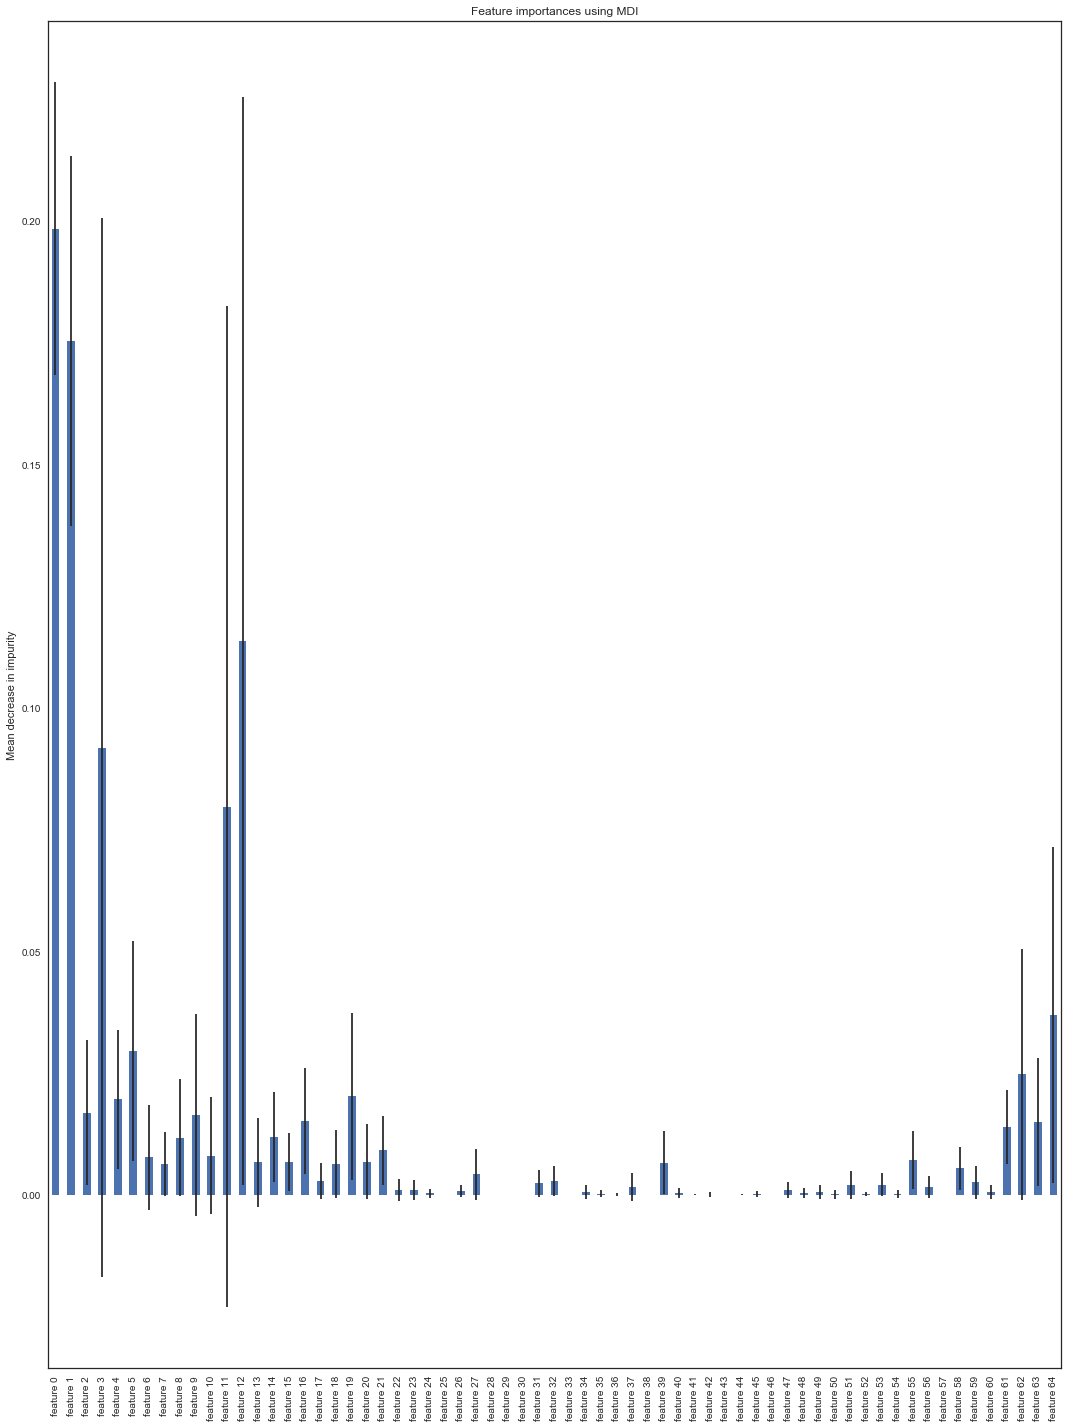

In [181]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax ,figsize=(15,20))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()